In [33]:
import os as os
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [17]:
channel_thresholds = pd.DataFrame(
    columns=[
        "ch",
        "thr_dac",
        "thr_kev"
    ]
)
col_names = ["ch", "thr_kev", "nan", "enc_kev"]
for thr in range(170, 225, 5):
    data_thr = pd.read_csv(r"C:\Users\ghisl\Documents\GitHub\charge_scan_elaboration_plots\python_script_CLI\output\FTHR_THR_" + str(thr) + r"_pt5_ch_0-31\ENC_THR\ch0-31_THR_ENC.dat", sep="\t", header=None, names=col_names)

    for ch in range(0, 32):
        ch_thr_kev = data_thr[data_thr.ch==ch].thr_kev.to_numpy()[0]
        row_to_append = pd.DataFrame(
            {
                "ch": [ch],
                "thr_dac": [thr],
                "thr_kev": [ch_thr_kev]
            }
        )
        channel_thresholds = pd.concat([channel_thresholds, row_to_append])

print(channel_thresholds)


    ch thr_dac       thr_kev
0    0     170  1.223352e+04
0    1     170  1.223352e+04
0    2     170  3.258582e+06
0    3     170  1.223352e+04
0    4     170  1.223352e+04
..  ..     ...           ...
0   27     220  4.386905e+00
0   28     220  1.321693e+01
0   29     220 -6.560916e+01
0   30     220 -6.560916e+01
0   31     220  3.561909e+01

[352 rows x 3 columns]


In [32]:
def linear_model(x, m, q):
    return m * x + q

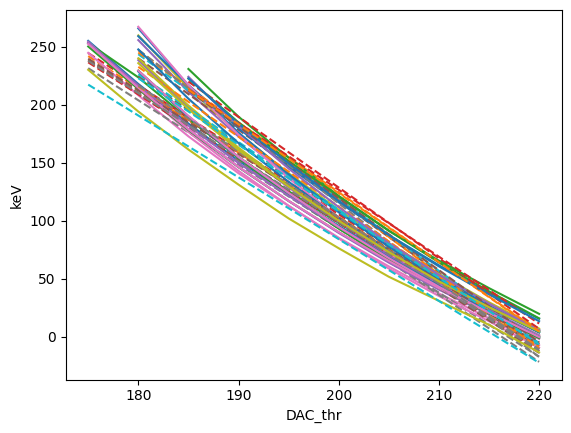

[5.549051371342392, 5.564335186132634, 6.163790866682308, 5.531788466680908, 6.229395462121763, 6.028832128337796, 6.095571171157316, 5.8720247666816725, 5.780351522439025, 5.8464071633482835, 6.4436211011017, 5.536439721226371, 5.610683955165927, 6.624855262396511, 5.670000245529244, 6.0273019466820115, 5.709368150014651, 5.479798686074732, 5.557460133347634, 5.332958676498221, 5.655754318546271, 5.770283445252869, 6.200466750622351, 5.6940937100146165, 5.738959928082905, 5.9510467333485035]
5.833255418031869
0.3102044240101743


In [52]:
plt.clf()
dac_gain = []
for ch in range(0, 29):
    if ch != 2 and ch != 12 and ch!=6:
        x_data = channel_thresholds[(channel_thresholds.ch==ch) & (channel_thresholds.thr_kev<300)].thr_dac
        y_data = channel_thresholds[(channel_thresholds.ch==ch) & (channel_thresholds.thr_kev<300)].thr_kev
        plt.plot(x_data, y_data, label=ch)
        parameters, covariance = curve_fit(linear_model, x_data, y_data)
        plt.plot(x_data, linear_model(x_data, parameters[0], parameters[1]), "--")
        dac_gain.append(np.abs(parameters[0]))

plt.xlabel("DAC_thr")
plt.ylabel("keV")
# plt.legend()
plt.show()

print(dac_gain)
print(np.mean(dac_gain))
print(np.std(dac_gain))